In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [54]:
sbn.set_style("darkgrid")

In [55]:
veriler = pd.read_csv('train.csv')
veriler.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [56]:
missingValues = veriler.isnull().sum()  # her kolon için eksik verileri topluyoruz
missingValues

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [57]:
veriler.describe() 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [58]:
veriler.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,41459,43957,43957,41451,43957,43957,43957,43194
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,30587,14197,20147,5519,17749,37572,29400,39429


In [59]:
pd.unique(veriler['workclass'])  # iş gruplarını görüyoruz

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', nan, 'Never-worked', 'Without-pay'],
      dtype=object)

In [60]:
pd.unique(veriler['occupation'])  # meslekleri görüyoruz

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [61]:
veriler.dropna(axis=0, inplace=True)  # eksik veriye sahip satırları kaldırıyoruz
veriler.isnull().sum()  # her kolon için eksik verileri topluyoruz

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [62]:
gender = pd.crosstab(index=veriler['gender'], columns='Count') # veri setindeki kadın-erkek dağılımına bakıyoruz
gender

col_0,Count
gender,
Female,13237
Male,27490


In [63]:
# kadın ve erkeklerin gelir durumlarınu oranlıyoruz
genderSalaryStatus = pd.crosstab(index=veriler['gender'], columns=veriler['income_>50K'], normalize='index')
genderSalaryStatus

income_>50K,0,1
gender,,
Female,0.886379,0.113621
Male,0.687595,0.312405


In [64]:
# yaşa göre gelir durumuna bakıyoruz
ageIncome = pd.crosstab(index=veriler['age'], columns=veriler['income_>50K'])
ageIncome

income_>50K,0,1
age,,
17,455,0
18,642,0
19,784,2
20,834,1
21,814,6
...,...,...
86,1,0
87,1,0
88,4,1


In [65]:
# eğitim seviyesine göre gelir durumuna bakıyoruz
eduIncome = pd.crosstab(index=veriler['education'], columns=veriler['income_>50K'])
eduIncome

income_>50K,0,1
education,,
10th,1021,77
11th,1399,82
12th,481,39
1st-4th,195,7
5th-6th,392,21
7th-8th,689,51
9th,580,35
Assoc-acdm,990,370
Assoc-voc,1288,452


/Users/eminerol/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eminerol/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eminerol/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Gelir Durumu Dağılımı'}, xlabel='income_>50K', ylabel='count'>

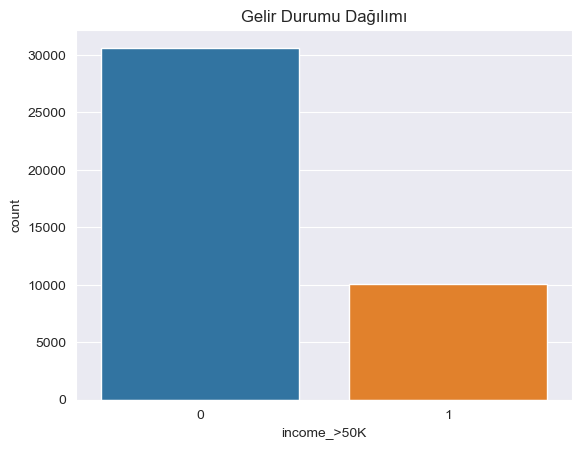

In [66]:
plt.figure(1)
plt.title('Gelir Durumu Dağılımı')
sbn.countplot(x='income_>50K', data=veriler)

/var/folders/5s/cvlvyfbs0bjcdgvl0z31phj80000gn/T/ipykernel_8672/4074139121.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(veriler['age'], bins=10, kde=False)


<Axes: title={'center': 'Yaş Durumu Dağılımı'}, xlabel='age'>

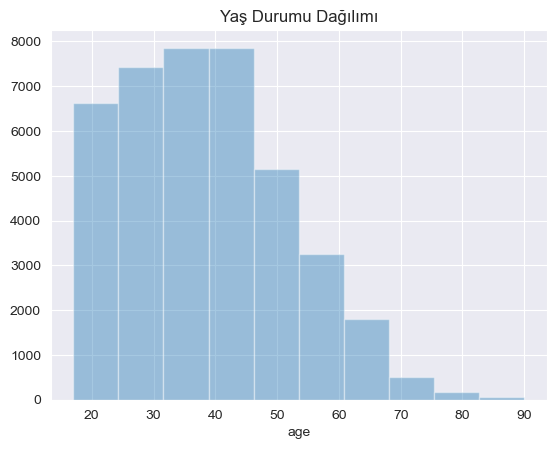

In [67]:
# yaş durumu dağılımı
plt.figure(2)
plt.title('Yaş Durumu Dağılımı')
plt.xlabel('Age')
sbn.distplot(veriler['age'], bins=10, kde=False)

In [68]:
veriler.drop('race', axis=1, inplace=True)
veriler.drop('native-country', axis=1, inplace=True)
veriler.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,Male,99999,0,60,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,Male,0,0,15,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Male,0,0,40,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Male,0,0,40,0


In [77]:
# dummy variable ile verileri sayısal hale getiriyoruz
veriler = pd.get_dummies(data=veriler, drop_first=True)
veriler.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male
0,67,366425,16,99999,0,60,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,17,244602,8,0,0,15,0,False,True,False,...,False,False,False,False,False,False,True,False,False,True
2,31,174201,13,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,58,110199,4,0,0,40,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,25,149248,10,0,0,40,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [73]:
# logistic regression
x = veriler.drop('income_>50K', axis=1).values
y = veriler['income_>50K'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [74]:
logReg = LogisticRegression(max_iter=10000)
logReg.fit(x_train, y_train)
logPredict = logReg.predict(x_test)

In [75]:
# dogruluk degerini ve confusion matrixi bulalım
accuracyScore = accuracy_score(y_test, logPredict)
cm = confusion_matrix(y_test, logPredict)
print(accuracyScore)
print(cm)

0.79089941893772
[[8862  303]
 [2252  802]]


In [78]:
print('Yanlis siniflandirilan ornek sayisi: ', (logPredict != y_test).sum())

Yanlis siniflandirilan ornek sayisi:  2555


Text(0.5, 427.9555555555555, 'Tahmin Etiketi')

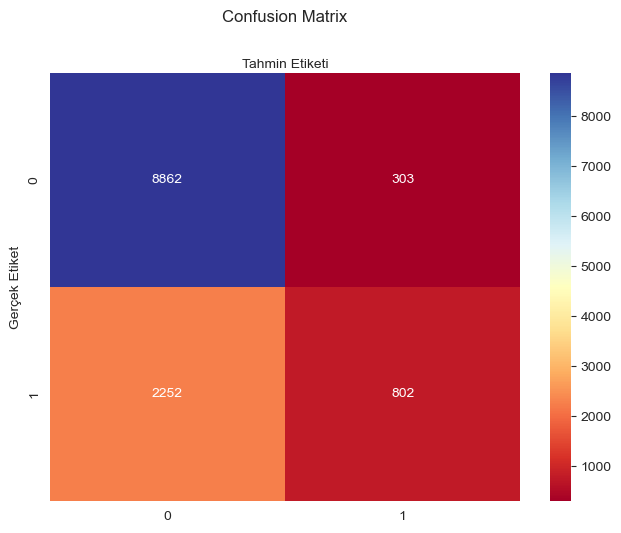

In [81]:
# modelimizi cizelim
classNames = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

sbn.heatmap(pd.DataFrame(cm), annot=True, cmap='RdYlBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Etiketi')

In [83]:
# KNN Sınıflandırması
accScoreKNN = {}
for i in range(1, 20):
    KNN = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    KNN.fit(x_train, y_train)
    KNNPredict = KNN.predict(x_test)
    accScoreKNN[i] = accuracy_score(y_test, KNNPredict)
print(accScoreKNN)

{1: 0.7226450609706195, 2: 0.7769048203617317, 3: 0.7487519436942467, 4: 0.7829609624355512, 5: 0.7697847614371062, 6: 0.7871347900810214, 7: 0.7787052950323267, 8: 0.7894263032981422, 9: 0.7831246419510598, 10: 0.79089941893772, 11: 0.7885260659628448, 12: 0.7930272526393322, 13: 0.7907357394222113, 14: 0.7945822080366642, 15: 0.7933546116703495, 16: 0.7943366887634012, 17: 0.7933546116703495, 18: 0.7942548490056469, 19: 0.793518291185858}


In [84]:
# 16 komsulu KNN en iyi sonucu urettigi icin onu kullanalim
KNN = KNeighborsClassifier(n_neighbors=16, metric='minkowski')
KNN.fit(x_train, y_train)
KNNPredict = KNN.predict(x_test)

In [85]:
cmKNN = confusion_matrix(y_test, KNNPredict)

Text(0.5, 427.9555555555555, 'Tahmin Etiketi')

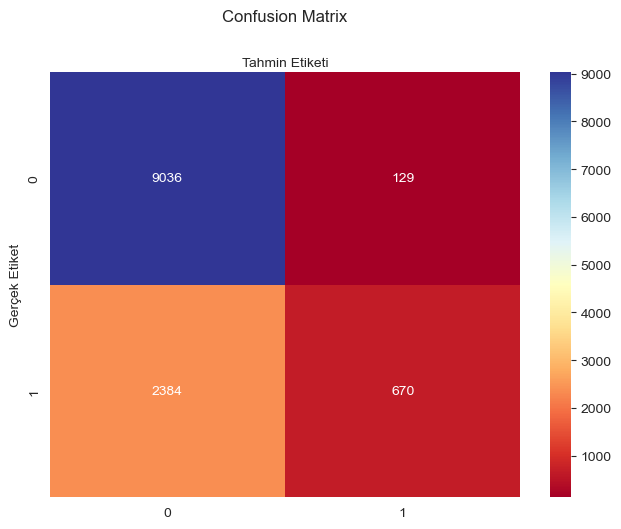

In [86]:
# modelimizi cizelim
classNames = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

sbn.heatmap(pd.DataFrame(cmKNN), annot=True, cmap='RdYlBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Etiketi')